In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from a csv file
filename = '/Users/administrator/Desktop/CIND820 Big Data Analytics Project/datanerd-startup-venture-funding/data/investments.csv'
df = pd.read_csv(filename)
df

,company_permalink,company_name,company_category_list,company_market,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,...,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/organization/test-company-3,test company,NaN,NaN,ARE,NaN,Dubai,Dubai,/person/jamessss-bondddd,jamessss bondddd,...,NaN,NaN,/funding-round/c308019016ead7afb2a1d117018eb6fc,seed,NaN,1921-09-01,21-Sep,1921-Q3,1921,1000.0
1,/organization/andrewburnett-com-ltd,AndrewBurnett.com Ltd,|Internet|SEO|Services|Public Relations|Social...,Internet,GBR,NaN,Edinburgh,Edinburgh,/organization/ekaf,Ekaf,...,NaN,NaN,/funding-round/14fe2864e02d0f15ddc3ec8eacdc8e1b,seed,NaN,1974-01-01,Jan-74,1974-Q1,1974,NaN
2,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/antonio-murroni,ANTONIO MURRONI,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,Jan-79,1979-Q1,1979,1000000.0
3,/organization/abo-data,ABO Data,|Enterprise Software|,Enterprise Software,USA,TX,TX - Other,Italy,/person/filippo-murroni,FILIPPO Murroni,...,NaN,NaN,/funding-round/809e211b969c3f66440fc15ffcd29385,seed,NaN,1979-01-01,Jan-79,1979-Q1,1979,1000000.0
4,/organization/ikro,Ikro,NaN,NaN,BRA,NaN,BRA - Other,Canoas,/organization/crp-companhia-de-participacoes,CRP Companhia de Participações,...,NaN,NaN,/funding-round/46c353a8249170cc4b6ab89a522fefdc,venture,A,1982-06-01,Jun-82,1982-Q2,1982,724000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114501,/organization/helpling,Helpling,|Consumers|,Consumers,DEU,NaN,Berlin,Berlin,/person/lukasz-gadowski,Lukasz Gadowski,...,NaN,NaN,/funding-round/681af1b330a13043b17aeac45d841b88,venture,A,2014-12-02,14-Dec,2014-Q4,2014,17000000.0
114502,/organization/appknox,Appknox,|Mobile Security|SaaS|Mobile|,Mobile Security,SGP,NaN,Singapore,Singapore,/person/rajan-anandan,Rajan Anandan,...,NaN,NaN,/funding-round/bfb0b5859be2431f35882bc03370dd67,venture,NaN,2014-12-02,14-Dec,2014-Q4,2014,NaN
114503,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/person/trevor-wright,Trevor Wright,...,NaN,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,2014-12-02,14-Dec,2014-Q4,2014,1200000.0
114504,/organization/strap,Strap,|Apps|,Apps,USA,OH,Cincinnati,Cincinnati,/person/wendy-lea,Wendy Lea,...,NaN,NaN,/funding-round/375e6c61fec5b3854ecbe5732dfdcabe,seed,NaN,2014-12-02,14-Dec,2014-Q4,2014,1200000.0


In [3]:
# removing features
df = df.drop(['investor_category_list','investor_market','funded_at', 'company_state_code','investor_state_code','funding_round_code',
                      'funded_month','funded_quarter','funding_round_permalink'], axis=1)

#replace all Nan to 0 in raised_amount_usd column
df['raised_amount_usd'] = df['raised_amount_usd'].fillna(0)

#convert column raised_amount_usd from float to int
df = df.astype({"raised_amount_usd":'int'})

In [4]:
#Changing the value from dollar to million.

df['raised_amount_usd'] = df['raised_amount_usd']/1000000

In [5]:
# average funding by each funding round type
pd.pivot_table(df, index='funding_round_type',values='raised_amount_usd',
               aggfunc=np.mean).sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
funding_round_type,
post_ipo_debt,373.919103
post_ipo_equity,293.248449
private_equity,69.849857
secondary_market,21.142498
debt_financing,20.386740
venture,14.272735
grant,5.488604
undisclosed,1.851566
product_crowdfunding,1.241036


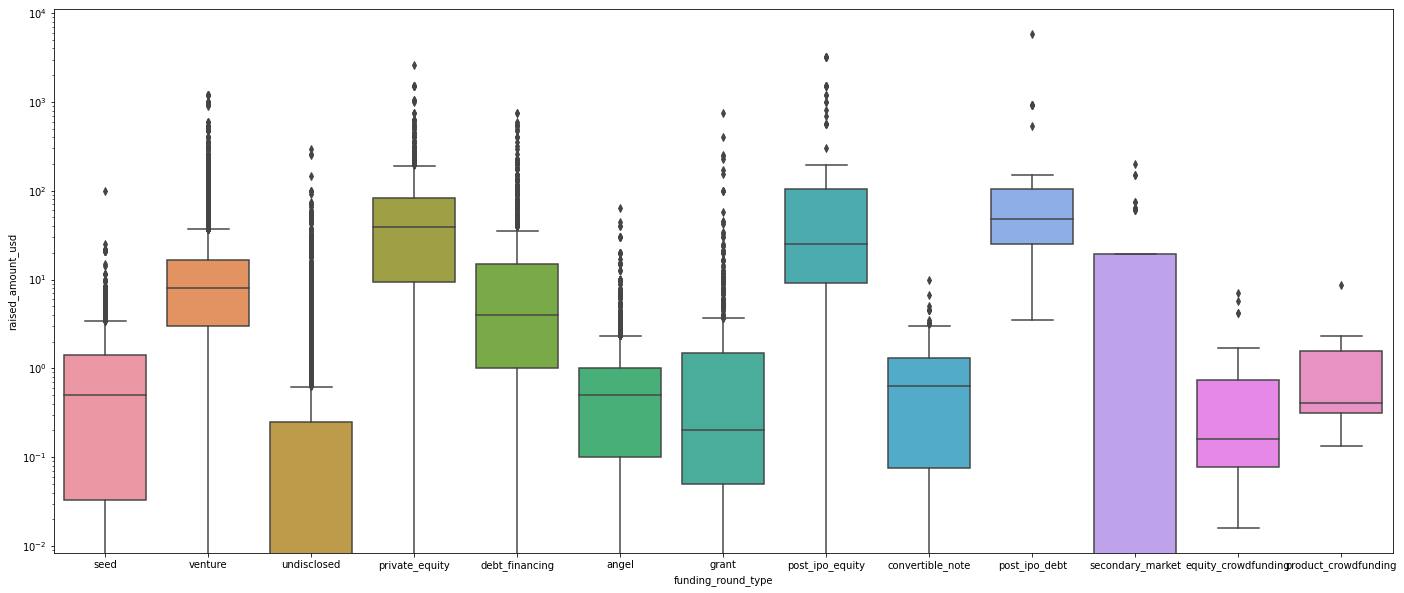

In [6]:
# the range of funding by each funding round type
plt.figure(figsize=(24,10))
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=df)
plt.yscale('log')
plt.show()

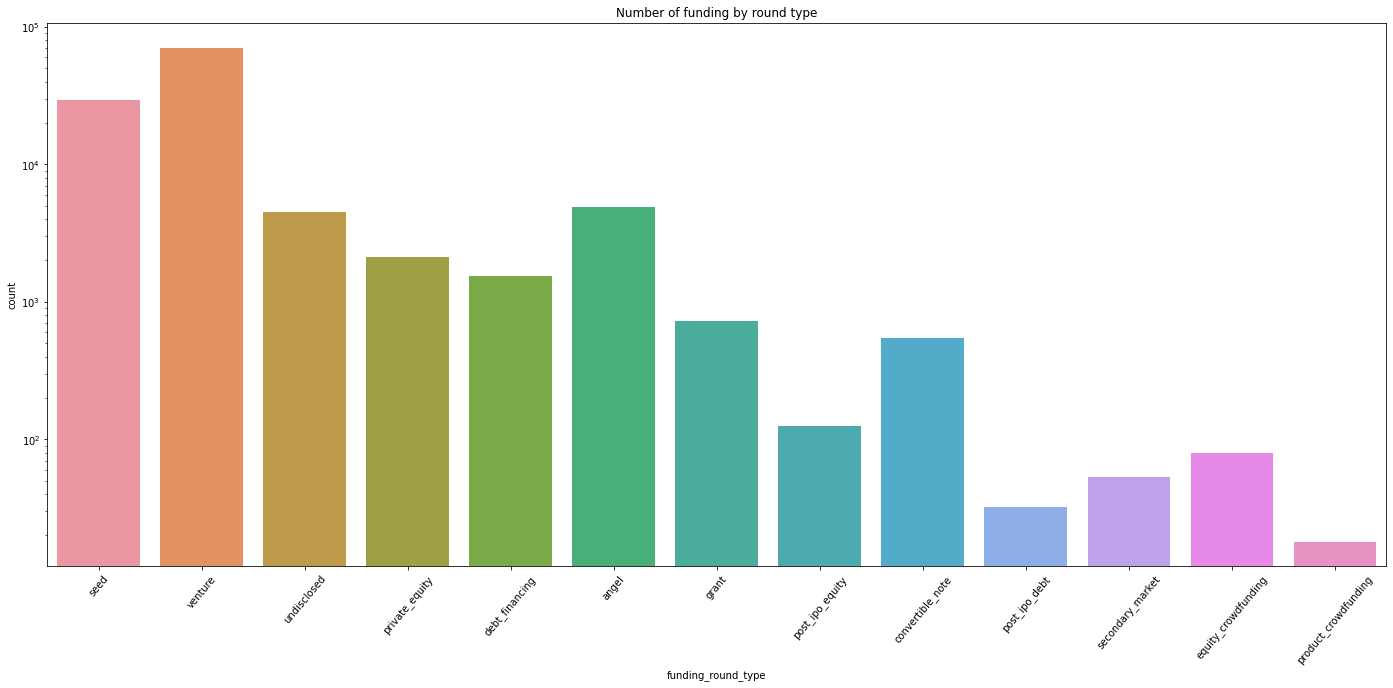

In [7]:
# Number of funding made by each funding round type

plt.figure(figsize=(24,10))
sns.countplot(x='funding_round_type', data=df)
plt.yscale('log')
plt.xticks(rotation=50)
plt.title("Number of funding by round type")
plt.show()

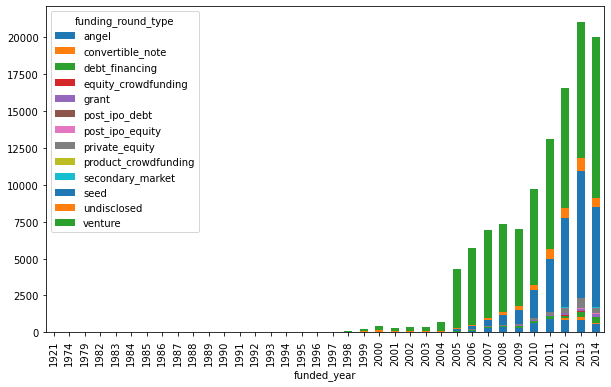

In [8]:
df.groupby('funded_year')['funding_round_type'].value_counts().unstack().plot(kind = 'bar', 
                                                                stacked = True, 
                                                                figsize = (10, 6))

### Analysis of selective funding round type - Venture, Seed, Private Equity and Angel

In [9]:
# Filter the data which contains only these round type
df_new = df[(df['funding_round_type']=='venture')|
      (df['funding_round_type']=='seed')|
      (df['funding_round_type']=='angel')|
      (df['funding_round_type']=='private_equity')]


In [10]:
df_new['funding_round_type'].value_counts()

venture           70615
seed              29272
angel              4894
private_equity     2128
Name: funding_round_type, dtype: int64

In [11]:
pd.pivot_table(data=df_new, index='funding_round_type',values='raised_amount_usd',
               aggfunc=np.sum).sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
funding_round_type,
venture,1.007869e+06
private_equity,1.486405e+05
seed,2.578509e+04
angel,4.421907e+03


In [12]:
# investment made by the funding round type
pd.pivot_table(data=df_new, index='funding_round_type',values='raised_amount_usd',
               aggfunc=np.mean).sort_values(by='raised_amount_usd', ascending=False)

,raised_amount_usd
funding_round_type,
private_equity,69.849857
venture,14.272735
angel,0.903536
seed,0.880879


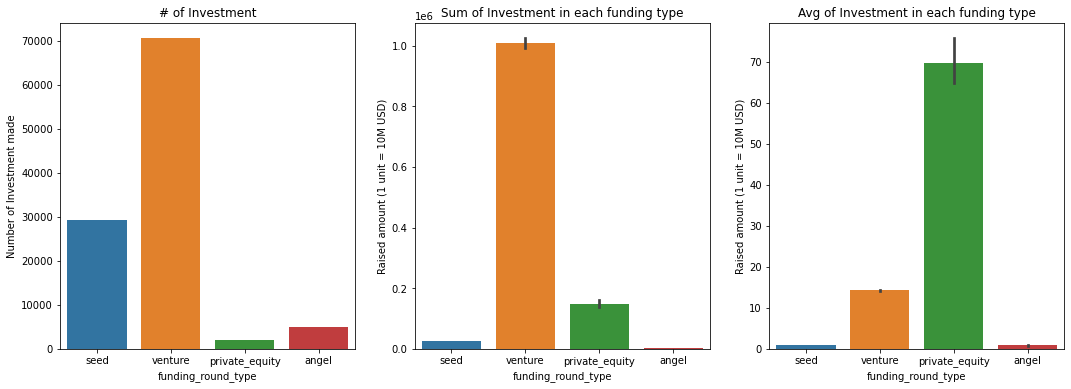

In [13]:
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.countplot(x='funding_round_type',data=df_new)
plt.title('# of Investment')
plt.ylabel('Number of Investment made')

plt.subplot(1,3,2)
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=df_new,estimator=np.sum)
plt.title('Sum of Investment in each funding type')
plt.ylabel('Raised amount (1 unit = 10M USD)')

plt.subplot(1,3,3)
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=df_new, estimator=np.mean)
plt.title('Avg of Investment in each funding type')
plt.ylabel('Raised amount (1 unit = 10M USD)')

plt.show()



In [14]:
# summary of funding
df_new['raised_amount_usd'].describe()

count    106909.000000
mean         11.100251
std          32.210513
min           0.000000
25%           0.800000
50%           3.600000
75%          12.000000
max        2600.000000
Name: raised_amount_usd, dtype: float64

In [15]:
# Now considering the investment in the range 

print('Venture fund average = ',round(df_new[df_new['funding_round_type']=='venture']['raised_amount_usd'].mean(), 2))
print('Seed fund average = ',round(df_new[df_new['funding_round_type']=='seed']['raised_amount_usd'].mean(), 2))
print('Angel fund average = ',round(df_new[df_new['funding_round_type']=='angel']['raised_amount_usd'].mean(), 2))
print('Private equity fund average = ',round(df_new[df_new['funding_round_type']=='private_equity']['raised_amount_usd'].mean(), 2))

Venture fund average =  14.27
Seed fund average =  0.88
Angel fund average =  0.9
Private equity fund average =  69.85


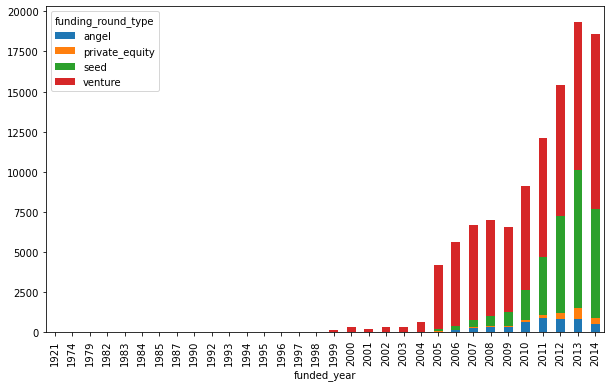

In [16]:
df_new.groupby('funded_year')['funding_round_type'].value_counts().unstack().plot(kind = 'bar', 
                                                                stacked = True, 
                                                                figsize = (10, 6))

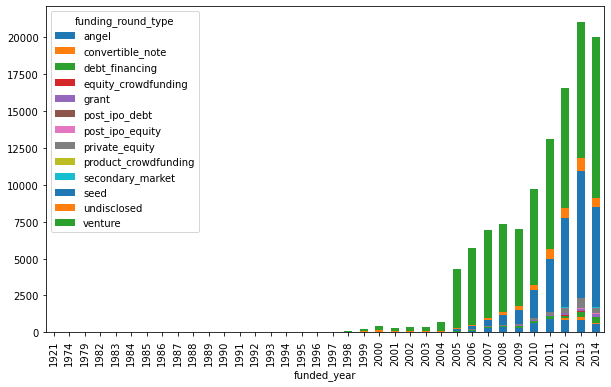

In [17]:
df.groupby('funded_year')['funding_round_type'].value_counts().unstack().plot(kind = 'bar',
                                                            stacked = True, 
                                                            figsize = (10, 6))